PROBLEM 1- WHOLESALE CUSTOMER ANALYSIS

In [4]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [5]:
wca= pd.read_csv('Wholesale+Customers+Data.csv')
wca.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [6]:
print('Descriptive statistics of data:')
wca.describe().T

Descriptive statistics of data:


,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
print('Descriptive Statistics of data including Channel & Retail:')
wca.describe(include='all').T

Descriptive Statistics of data including Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [8]:
wca_spending = copy.deepcopy(wca)
wca_spending['Spending']=wca['Fresh']+wca['Milk']+wca['Grocery']+wca['Frozen']+wca['Detergents_Paper']+wca['Delicatessen']
wca_spending

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [9]:
reg_df = wca_spending.groupby('Region')['Spending'].sum()
print(reg_df)
channel_df = wca_spending.groupby('Channel')['Spending'].sum()
print(channel_df)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64
Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

Text(0.5, 1.0, 'Item - Fresh')

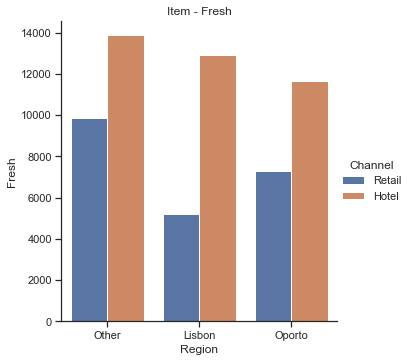

In [49]:
#Item-Fresh

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Fresh", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Milk')

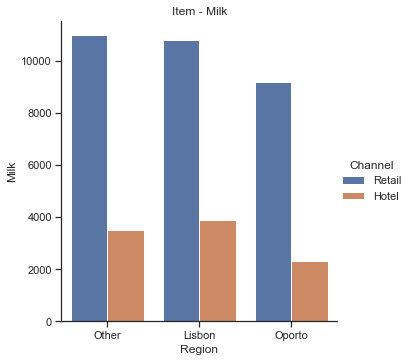

In [57]:
#Item-Milk

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Milk", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Grocery')

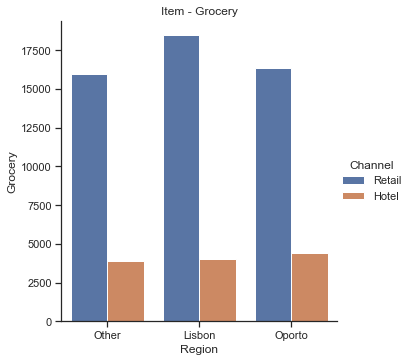

In [55]:
#Item-Grocery

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Grocery", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

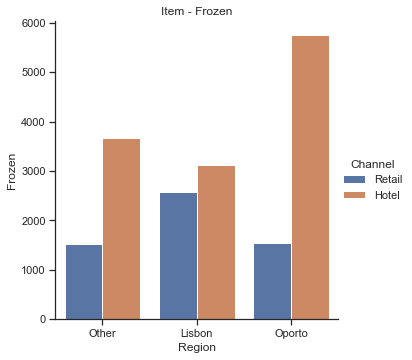

In [54]:
#Item-Frozen

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Frozen", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

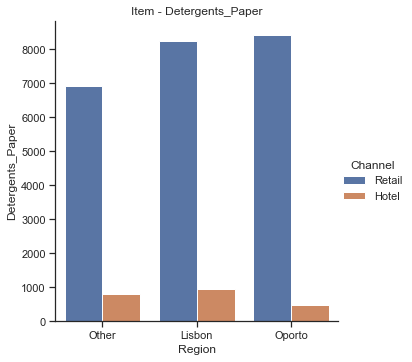

In [53]:
#Item-Detergents_Paper

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Detergents_Paper", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Delicatessen')

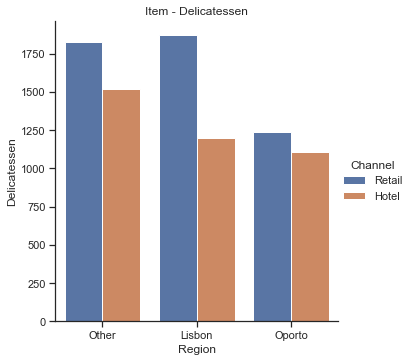

In [58]:
#Item-Delicatessen

sns.set(style="ticks", color_codes=True)
sns.catplot(x="Region", y="Delicatessen", hue ="Channel", kind="bar", ci=None, data=wca)
plt.title('Item - Delicatessen')

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [41]:
items= wca[wca.columns[+2:wca.columns.size]]

In [42]:
Cv_Fresh = np.std(items['Fresh']) / np.mean(items['Fresh'])
Cv_Fresh

1.0527196084948245

In [43]:
Cv_Milk = np.std(items['Milk']) / np.mean(items['Milk'])
Cv_Milk

1.2718508307424503

In [44]:
Cv_Grocery = np.std(items['Grocery']) / np.mean(items['Grocery'])
Cv_Grocery

1.193815447749267

In [45]:
Cv_Frozen = np.std(items['Frozen']) / np.mean(items['Frozen'])
Cv_Frozen

1.5785355298607762

In [46]:
Cv_Detergents_Paper = np.std(items['Detergents_Paper']) / np.mean(items['Detergents_Paper'])
Cv_Detergents_Paper

1.6527657881041729

In [47]:
Cv_Delicatessen = np.std(items['Delicatessen']) / np.mean(items['Delicatessen'])
Cv_Delicatessen

1.8473041039189306

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

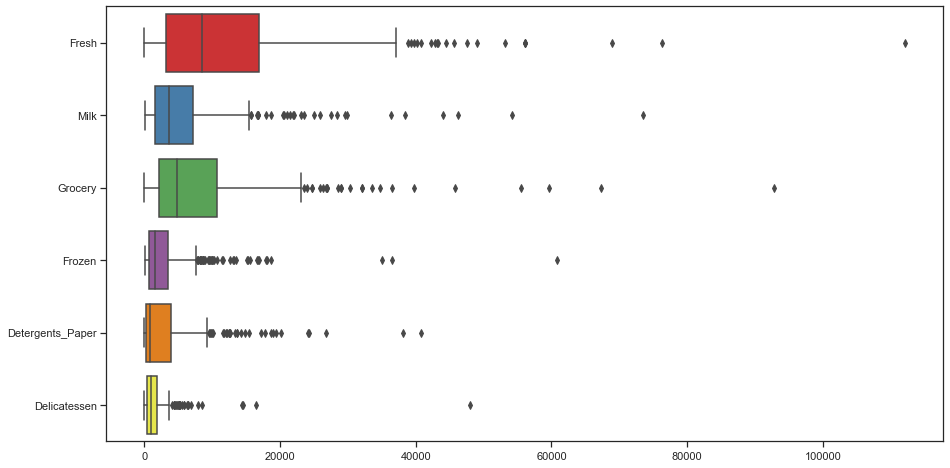

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(data=items, orient="h", palette="Set1")

PROBLEM 2- CMSU SURVEY ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import copy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [4]:
cmsu=pd.read_excel('Survey-1.xls')
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [5]:
pd.crosstab(cmsu['Gender'],cmsu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [6]:
pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [7]:
pd.crosstab(cmsu['Gender'],cmsu['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [8]:
pd.crosstab(cmsu['Gender'],cmsu['Computer'])


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [52]:
cmsu['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [32]:
probm=29*100/len(cmsu['Gender'])
print('Probability that a randomly selected candidate will be male:',probm)

Probability that a randomly selected candidate will be male: 46.774193548387096


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [53]:
probf=33*100/len(cmsu['Gender'])
print('Probability that a randomly selected candidate will be female:',probf)

Probability that a randomly selected candidate will be female: 53.225806451612904


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [54]:
pd.crosstab(cmsu['Gender'],cmsu['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [21]:
print('Among MALE candidates:')
print('Probability of being an Accounting student:',4*100/29)
print('Probability of being a CIS student:',1*100/29)
print('Probability of being an Economics/Finance student:',4*100/29)
print('Probability of being a student of International Business:',2*100/29)
print('Probability of being a Management student:',6*100/29)
print('Probability of being a student of Other major:',4*100/29)
print('Probability of being a Retailing/Marketing student:',5*100/29)
print('Probability of being a student of Undecided category:',3*100/29)

Among MALE candidates:
Probability of being an Accounting student: 13.793103448275861
Probability of being a CIS student: 3.4482758620689653
Probability of being an Economics/Finance student: 13.793103448275861
Probability of being a student of International Business: 6.896551724137931
Probability of being a Management student: 20.689655172413794
Probability of being a student of Other major: 13.793103448275861
Probability of being a Retailing/Marketing student: 17.24137931034483
Probability of being a student of Undecided category: 10.344827586206897


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [55]:
print('Among FEMALE candidates:')
print('Probability of being an Accounting student:',3*100/33)
print('Probability of being a CIS student:',3*100/33)
print('Probability of being an Economics/Finance student:',7*100/33)
print('Probability of being a student of International Business:',4*100/33)
print('Probability of being a Management student:',4*100/33)
print('Probability of being a student of Other major:',3*100/33)
print('Probability of being a Retailing/Marketing student:',9*100/33)
print('Probability of being a student of Undecided category:',0*100/33)

Among FEMALE candidates:
Probability of being an Accounting student: 9.090909090909092
Probability of being a CIS student: 9.090909090909092
Probability of being an Economics/Finance student: 21.21212121212121
Probability of being a student of International Business: 12.121212121212121
Probability of being a Management student: 12.121212121212121
Probability of being a student of Other major: 9.090909090909092
Probability of being a Retailing/Marketing student: 27.272727272727273
Probability of being a student of Undecided category: 0.0


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [11]:
print('Probability that a randomly chosen student is a male and intends to graduate:', ((17/29)*100))

Probability that a randomly chosen student is a male and intends to graduate: 58.620689655172406


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [13]:
print('Probability that a randomly chosen student is a female and does not have a laptop:',((4/33)*100))

Probability that a randomly chosen student is a female and does not have a laptop: 12.121212121212121


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [29]:
pd.crosstab(cmsu['Gender'],cmsu['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [30]:
print(' Probability that a randomly chosen student is a male or has full-time employment:',(29/62+10/62-7/62)*100)

 Probability that a randomly chosen student is a male or has full-time employment: 51.61290322580645


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [15]:
msu1=cmsu[cmsu['Gender']!='Male']

In [17]:
pd.crosstab(msu1['Gender'],msu1['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing
Gender,,,,,,,
Female,3,3,7,4,4,3,9


In [24]:
pf=((4/33)+(4/33))*100
print('Probability that given a female student is randomly chosen, she is majoring in international business or management:',pf)

Probability that given a female student is randomly chosen, she is majoring in international business or management: 24.242424242424242


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [18]:
cmsu1=cmsu[cmsu['Grad Intention']!='Undecided']

In [19]:
pd.crosstab(cmsu1['Gender'],cmsu1['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [26]:
print('The Probability that a randomly selected student has an intention to graduate:', (28/40))

The Probability that a randomly selected student has an intention to graduate: 0.7


In [25]:
print('The Probability that a randomly selected student has graduation intention and is female:',(11 / 20 ))

The Probability that a randomly selected student has graduation intention and is female: 0.55


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [44]:
pd.crosstab(cmsu['Gender'],cmsu['GPA'],margins='TRUE')

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [12]:
print('Probability of choosing a student whose GPA is less than 3:',(1+1+6+2+3+4)/62*100)

Probability of choosing a student whose GPA is less than 3: 27.419354838709676


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [45]:
pd.crosstab(cmsu['Gender'],cmsu['Salary'],margins='TRUE')

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [5]:
print('Probability that a randomly selected male earns 50 or more:',(1+1+3+3+1+0+0+1)/29*100)

Probability that a randomly selected male earns 50 or more: 34.48275862068966


In [6]:
print('Probability that a randomly selected female earns 50 or more:',(0+0+5+5+0+1+1+1)/33*100)

Probability that a randomly selected female earns 50 or more: 39.39393939393939


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

<AxesSubplot:xlabel='GPA', ylabel='Count'>

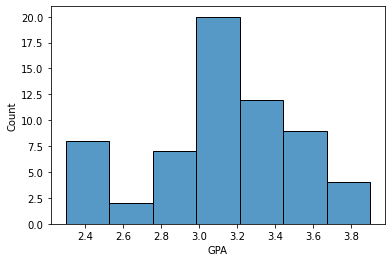

In [57]:
sns.histplot(cmsu['GPA'])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

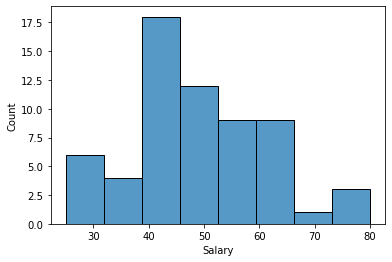

In [58]:
sns.histplot(cmsu['Salary'])

<AxesSubplot:xlabel='Spending', ylabel='Count'>

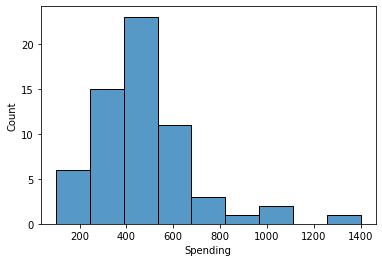

In [59]:
sns.histplot(cmsu['Spending'])

<AxesSubplot:xlabel='Text Messages', ylabel='Count'>

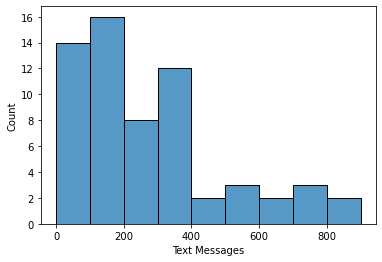

In [60]:
sns.histplot(cmsu['Text Messages'])

In [65]:
#ShapiroTest

a,b=stats.shapiro(cmsu['GPA'])
print('Shapiro test results for GPA- \n Statistics:',a,',p value:',b)
c,d=stats.shapiro(cmsu['Salary'])
print('Shapiro test results for Salary-\n Statistics:',c,',p value:',d)
e,f=stats.shapiro(cmsu['Spending'])
print('Shapiro test results for Spending- \n Statistics:',e,',p value:',f)
j,h=stats.shapiro(cmsu['Text Messages'])
print('Shapiro test results for Text Messages-\n Statistics:',j,',p value:',h)

Shapiro test results for GPA- 
 Statistics: 0.9685361981391907 ,p value: 0.11204058676958084
Shapiro test results for Salary-
 Statistics: 0.9565856456756592 ,p value: 0.028000956401228905
Shapiro test results for Spending- 
 Statistics: 0.8777452111244202 ,p value: 1.6854661225806922e-05
Shapiro test results for Text Messages-
 Statistics: 0.8594191074371338 ,p value: 4.324040673964191e-06


PROBLEM 3- A & B SHINGLES

In [14]:
import numpy as np
import pandas as pd
import math 
from scipy import stats
from scipy.stats import ttest_1samp , ttest_ind

In [15]:
hing= pd.read_csv('A+&+B+shingles.csv')
hing.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Testing A Shingles

In [16]:
hing['A'].mean()

0.3166666666666666

In [17]:
t_statistic,p_value=ttest_1samp(hing.A,0.35)
print('One sample t test \n t statistic: {0} \n p value : {1}'.format(t_statistic, p_value/2))

One sample t test 
 t statistic: -1.4735046253382782 
 p value : 0.07477633144907513


Testing B Shingles

In [18]:
hing['B'].mean()

0.2735483870967742

In [19]:
t_statistic , p_value= ttest_1samp(hing.B,0.35, nan_policy='omit')
print('One sample t test \n t statistic: {0} \n p value : {1}'.format(t_statistic, p_value/2))

One sample t test 
 t statistic: -3.1003313069986995 
 p value : 0.0020904774003191826


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [20]:
t_statistic, p_value= ttest_ind(hing['A'],hing['B'], equal_var=True , nan_policy='omit')
print('Two sample t test \n t statistic : {} \n p value : {}'.format(round(t_statistic,4), round(p_value,4)))

Two sample t test 
 t statistic : 1.2896 
 p value : 0.2017


THE END